In [11]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
import os
import PIL
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image

In [12]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [13]:
import cv2

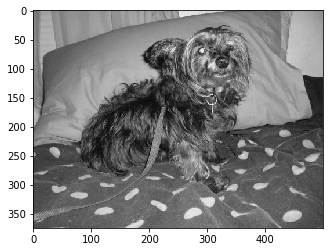

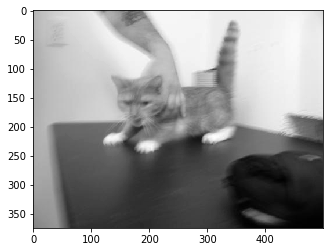

In [17]:
dpath="D:\DATASET\PetImages"
cate=["Dog","Cat"]
for category in cate:
    path=os.path.join(dpath,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break

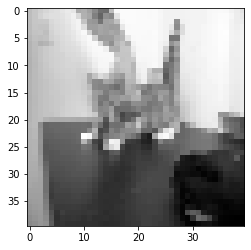

In [53]:
img_size=40
new_arr=cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_arr,cmap="gray")
plt.show()

In [54]:
training_data=[]
def trainingd():
    for category in cate:
        path=os.path.join(dpath,category)
        class_num=cate.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_arr=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_arr,class_num])
            except Exception as e:
                pass
trainingd()

In [55]:
len(training_data)

24946

In [56]:
import random
random.shuffle(training_data)

In [57]:
for sample in training_data:
    print(sample[1])

0
0
0
1
1
1
0
1
1
1
1
1
1
1
1
0
0
0
1
0
0
0
1
1
1
1
0
0
1
1
1
1
0
1
1
0
0
0
1
1
0
0
0
1
1
1
0
1
1
0
0
1
0
1
1
0
0
0
1
0
0
0
1
0
1
0
1
1
0
1
1
0
1
0
1
0
0
0
1
0
1
1
1
1
0
0
0
1
1
0
0
1
0
0
1
1
1
1
0
0
0
1
0
1
0
0
1
0
0
0
0
1
0
1
1
0
0
0
0
1
0
0
0
1
1
1
0
1
1
0
1
0
1
1
0
1
0
0
1
0
1
1
0
0
0
0
0
1
0
0
1
0
1
1
0
0
0
0
0
1
1
0
1
0
0
0
0
1
1
1
0
1
0
1
1
1
1
0
1
1
0
0
0
1
1
0
0
0
0
0
0
1
1
0
1
0
0
1
0
0
0
0
0
1
1
0
0
0
1
0
1
0
0
0
1
1
1
0
0
1
1
0
0
1
1
1
1
0
1
1
1
0
1
0
1
0
0
0
1
0
1
1
1
1
0
1
1
1
1
1
1
0
0
0
0
1
1
0
0
0
0
1
1
0
0
1
0
0
1
1
1
0
1
0
0
1
1
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
1
1
0
1
0
1
1
1
1
1
0
0
1
1
0
0
0
0
0
0
1
1
1
1
1
0
1
0
1
0
0
1
0
1
0
0
0
0
0
0
1
0
1
1
1
0
0
1
0
1
0
1
1
1
1
0
1
0
0
0
0
0
1
0
0
0
1
1
0
1
1
0
0
1
1
0
1
1
1
0
1
0
1
0
0
0
0
0
0
0
0
1
0
1
1
0
1
0
1
1
1
0
0
0
1
0
0
1
0
0
0
0
0
0
0
1
1
0
1
0
0
0
1
0
0
0
0
0
0
0
1
0
1
1
0
1
1
0
0
0
0
1
1
0
1
0
0
0
1
1
1
1
0
0
1
0
1
1
0
1
0
0
0
1
0
1
1
1
0
0
0
0
0
1
0
1
0
0
0
1
0
1
1
1
1
1
1
0
1
0
1
0
0
0
0
1
0
1
0
1
0
0
1


In [58]:
X=[]
y=[]
for feature,label in training_data:
    X.append(feature)
    y.append(label)
X=np.array(X).reshape(-1,img_size,img_size,1)

In [59]:
import pickle
pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out1=open("y.pickle","wb")
pickle.dump(y,pickle_out1)
pickle_out1.close()

In [60]:
pickle_in=open("X.pickle","rb")
X=pickle.load(pickle_in)

pickle_in1=open("y.pickle","rb")
y=pickle.load(pickle_in1)

In [61]:
from tensorflow.keras.layers import Flatten 
from tensorflow.keras.layers import Activation
X=X/255.0
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=X.shape[1:],activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dense(1))
model.add(Activation("sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(X,y,batch_size=32,epochs=10,validation_split=0.1)

Train on 22451 samples, validate on 2495 samples
Epoch 1/10
22451/22451 [==============================] - 91s 4ms/sample - loss: 0.6231 - acc: 0.6430 - val_loss: 0.5489 - val_acc: 0.7307
Epoch 2/10
22451/22451 [==============================] - 91s 4ms/sample - loss: 0.5363 - acc: 0.7335 - val_loss: 0.5104 - val_acc: 0.7551
Epoch 3/10
22451/22451 [==============================] - 91s 4ms/sample - loss: 0.5003 - acc: 0.7582 - val_loss: 0.5553 - val_acc: 0.7138
Epoch 4/10
22451/22451 [==============================] - 92s 4ms/sample - loss: 0.4733 - acc: 0.7738 - val_loss: 0.4718 - val_acc: 0.7764
Epoch 5/10
22451/22451 [==============================] - 91s 4ms/sample - loss: 0.4463 - acc: 0.7932 - val_loss: 0.5191 - val_acc: 0.7503
Epoch 6/10
22451/22451 [==============================] - 92s 4ms/sample - loss: 0.4230 - acc: 0.8029 - val_loss: 0.4800 - val_acc: 0.7731
Epoch 7/10
22451/22451 [==============================] - 91s 4ms/sample - loss: 0.4046 - acc: 0.8146 - val_loss: 0.4